In [1]:
from snap import *
import csv
import operator
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
nodesList = {}

In [3]:
with open("pagenetwork-nodes-def.csv", 'rb') as f:
    reader = csv.reader(f)
    for row in reader:
        nodesList[row[0]] = (row[1],row[2])
f.close()            

In [4]:
GroupDemoGraphN = LoadEdgeList(PNGraph, "pagenetwork-edges-def.csv", 0, 1)

In [5]:
print "PageNetwork Nodes %d, Edges %d" % (GroupDemoGraphN.GetNodes(), GroupDemoGraphN.GetEdges())

PageNetwork Nodes 2557, Edges 14001


In [6]:
DrawGViz(GroupDemoGraphN, gvlDot, "pagenetwork-edges.png", "Graph") 

In [7]:
#PrintInfo(GroupDemoGraphN, "Python type PNGraph", "working\pagenetwork-info.txt", False)

In [7]:
InDegList = {}
OutDegList = {}
for NI in GroupDemoGraphN.Nodes():
    #print "node id %d, out-degree %d, in-degree %d" % (NI.GetId(), NI.GetOutDeg(), NI.GetInDeg())
    InDegList[NI.GetId()]=NI.GetInDeg()
    OutDegList[NI.GetId()]=NI.GetOutDeg()
InSort=sorted(InDegList.items(), key=operator.itemgetter(1),reverse=True)
OutSort=sorted(OutDegList.items(), key=operator.itemgetter(1),reverse=True)
#InSort[0],OutSort[0]

In [8]:
print " Max In Degree Node : %s" % (nodesList[str(InSort[0][0])][1])
print " Max Out Degree Node : %s" % (nodesList[str(OutSort[0][0])][1])

 Max In Degree Node : TED 
 Max Out Degree Node : Center for Comparative Conflict Studies (CFCCS) 


In [9]:
Count = CntNonZNodes(GroupDemoGraphN)
print "Directed Graph: Count of nodes with degree greater than 0 is %d" % Count

Directed Graph: Count of nodes with degree greater than 0 is 2557


In [10]:
DegToCntV = TIntPrV()
InDegToCntV = TIntPrV()
OutDegToCntV = TIntPrV()
GetDegCnt(GroupDemoGraphN, DegToCntV)
GetInDegCnt(GroupDemoGraphN, InDegToCntV)
GetOutDegCnt(GroupDemoGraphN, OutDegToCntV)
#for item in DegToCntV:
#    print "%d nodes with degree %d" % (item.GetVal2(), item.GetVal1())

In [11]:
DegList = [item.GetVal1() for item in DegToCntV]
FrqList = [item.GetVal2() for item in DegToCntV]
InDegList = [item.GetVal1() for item in InDegToCntV]
InFrqList = [item.GetVal2() for item in InDegToCntV]
OutDegList = [item.GetVal1() for item in OutDegToCntV]
OutFrqList = [item.GetVal2() for item in OutDegToCntV]

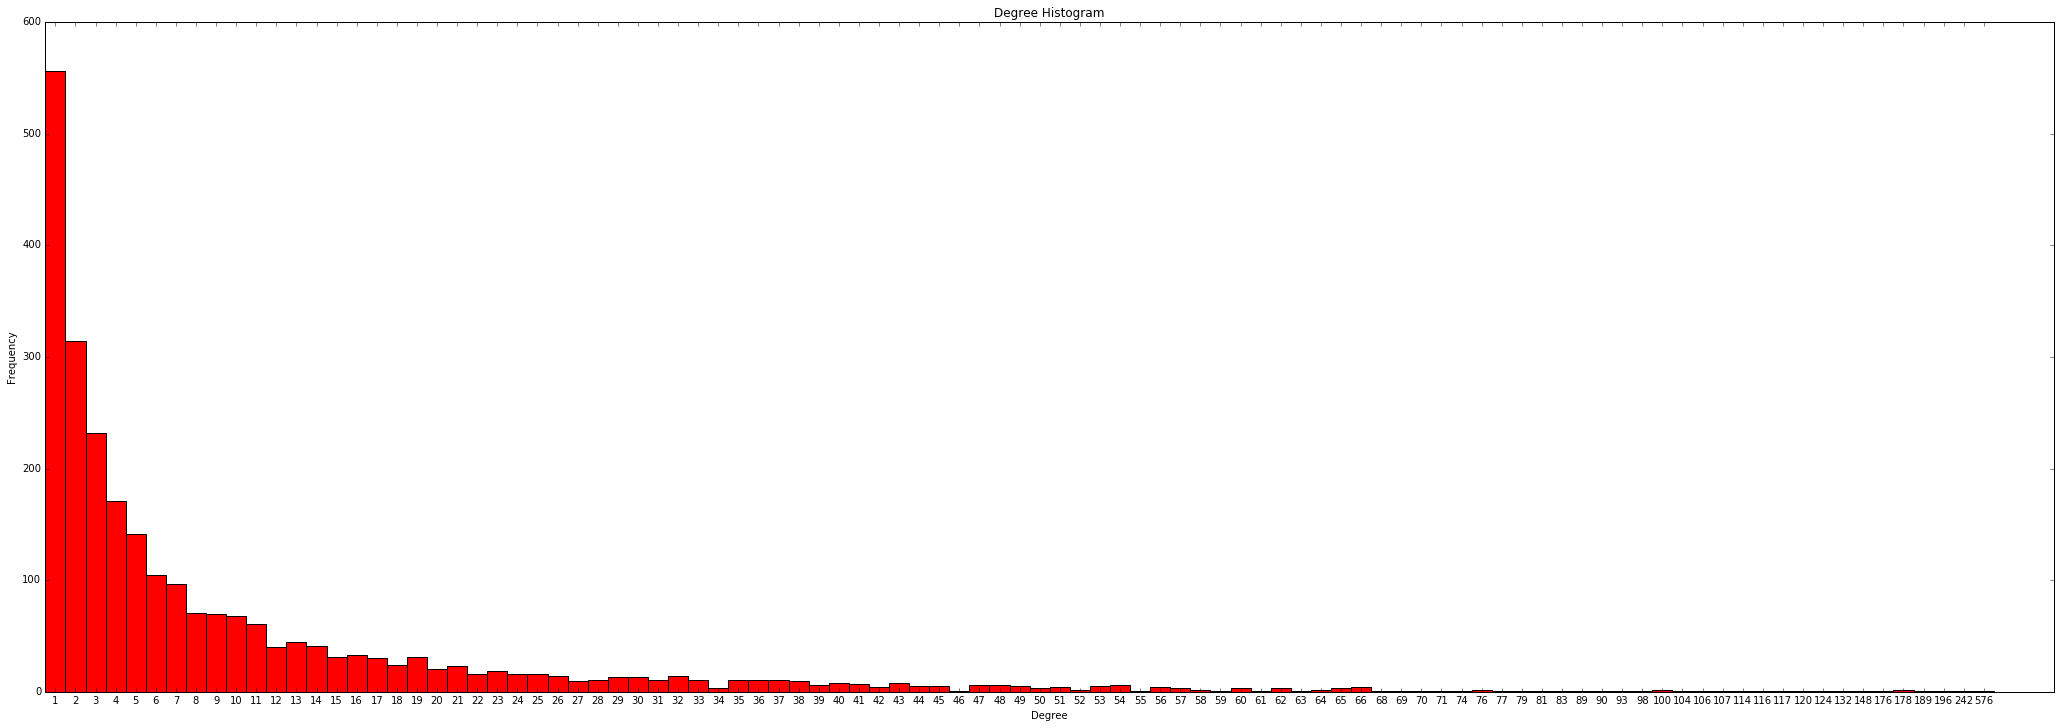

In [12]:
pos = np.arange(len(DegList))
width = 1    
plt.bar(pos, FrqList, width, color='r')
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.xticks(pos + width/2.0, DegList )
N = 3
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*N*2,plSize[1]*N))
fig = plt.figure(figsize=(20, 20))
plt.show()

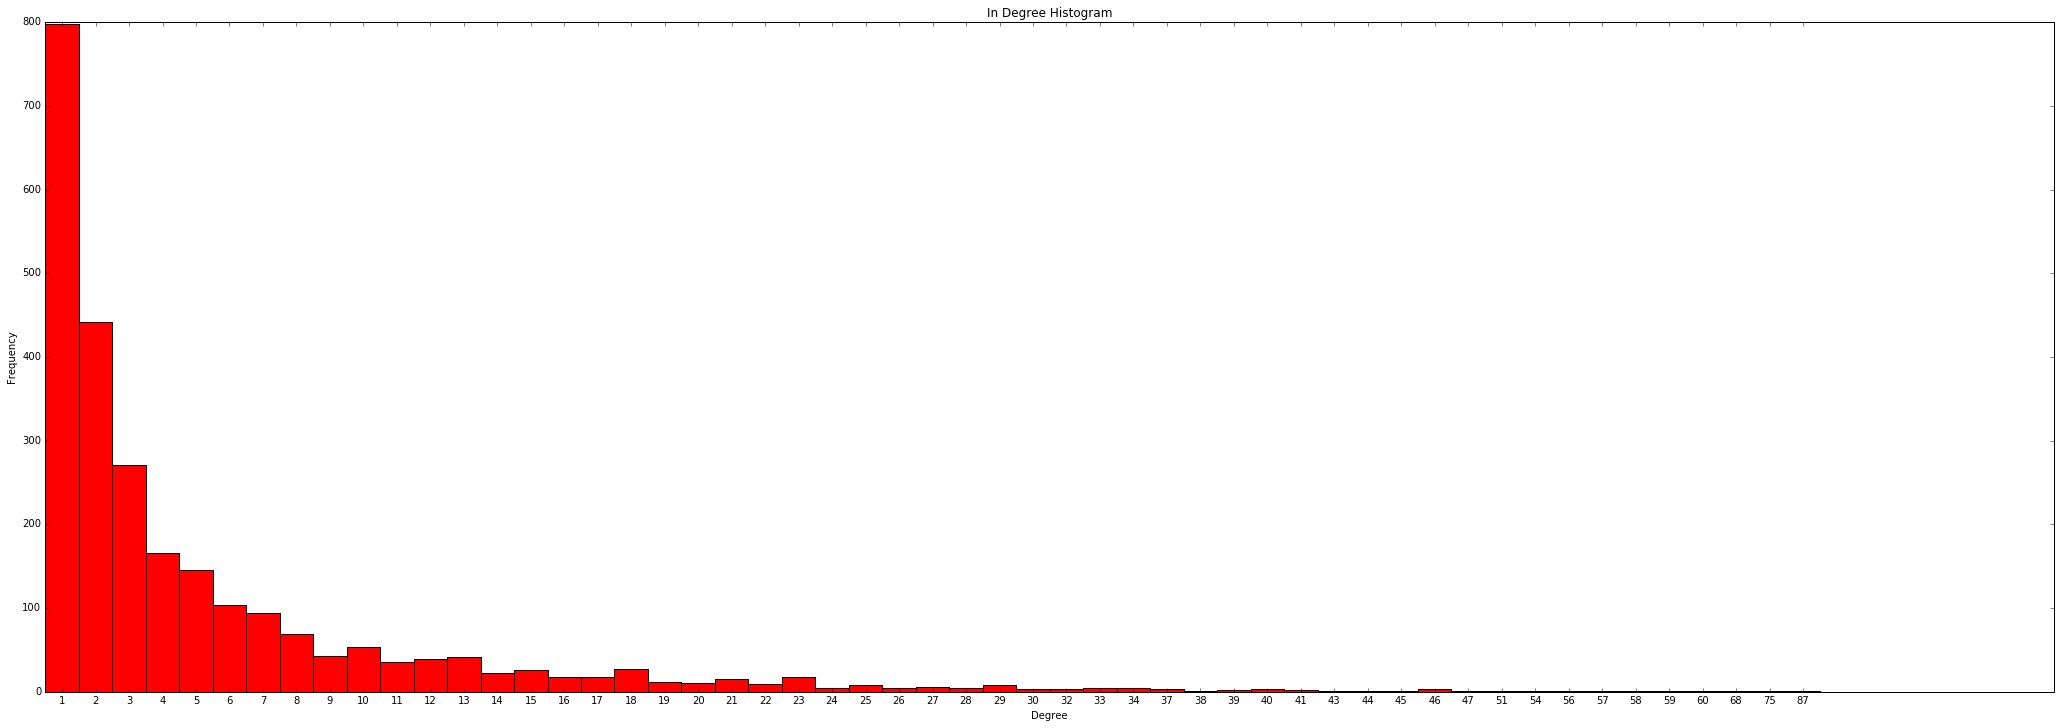

In [13]:
pos = np.arange(len(InDegList))
width = 1    
plt.bar(pos, InFrqList, width, color='r')
plt.title("In Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.xticks(pos + width/2.0, InDegList )
N = 3
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*N*2,plSize[1]*N))
fig = plt.figure(figsize=(20, 20))
plt.show()

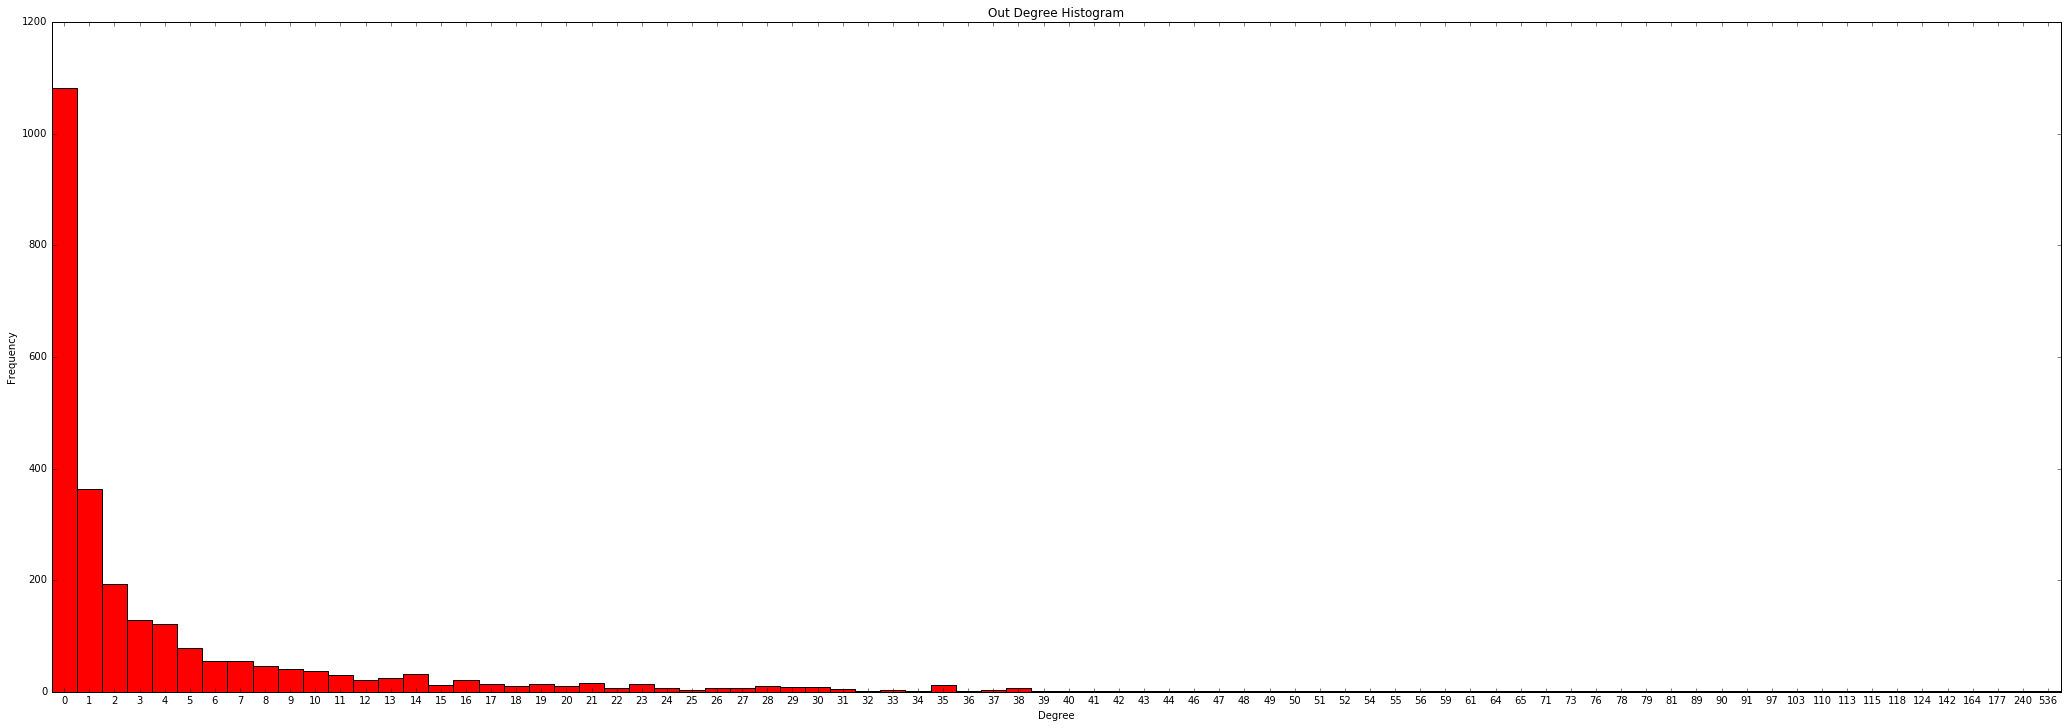

In [14]:
pos = np.arange(len(OutDegList))
width = 1    
plt.bar(pos, OutFrqList, width, color='r')
plt.title("Out Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.xticks(pos + width/2.0, OutDegList )
N = 3
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*N*2,plSize[1]*N))
fig = plt.figure(figsize=(20, 20))
plt.show()

In [16]:
NId1 = GetMxDegNId(GroupDemoGraphN)
print "Maximum Degree Node Id : %d Node Name : %s " % (NId1, (nodesList[str(NId1)][1]))

Maximum Degree Node Id : 37 Node Name : Center for Comparative Conflict Studies (CFCCS)  


In [17]:
NId1 = GetMxInDegNId(GroupDemoGraphN)
print "Maximum In Degree Node Id : %d Node Name : %s " % (NId1, (nodesList[str(NId1)][1]))

Maximum In Degree Node Id : 782 Node Name : TED  


In [18]:
NId1 = GetMxOutDegNId(GroupDemoGraphN)
print "Maximum Out Degree Node Id : %d Node Name : %s " % (NId1, (nodesList[str(NId1)][1]))

Maximum Out Degree Node Id : 37 Node Name : Center for Comparative Conflict Studies (CFCCS)  


In [19]:
Count = CntSelfEdges(GroupDemoGraphN)
print "Directed Graph: Count of self edges is %d" % Count

Directed Graph: Count of self edges is 5


In [20]:
Count = CntUniqBiDirEdges(GroupDemoGraphN)
print "Directed Graph: Count of unique bidirectional edges is %d" % Count

Directed Graph: Count of unique bidirectional edges is 1948


In [20]:
Count = CntUniqUndirEdges(GroupDemoGraphN)
print "Directed Graph: Count of unique undirected edges is %d" % Count

Directed Graph: Count of unique undirected edges is 12048


In [21]:
PlotSccDistr(GroupDemoGraphN, "pagenetwork-scc", "Directed graph - scc distributaion")

In [22]:
PlotWccDistr(GroupDemoGraphN, "pagenetwork-wcc", "Directed graph - wcc distributaion")

In [23]:
#for EI in GroupDemoGraphN.Edges():
#    print "(%d, %d)" % (EI.GetSrcNId(), EI.GetDstNId())

In [24]:
#for NI in GroupDemoGraphN.Nodes():
#    for DstNId in NI.GetOutEdges():
#        print "(%d %d)" % (NI.GetId(), DstNId)

In [23]:
Desc1 = "pagenetwork-InDeg"
PlotInDegDistr(GroupDemoGraphN, Desc1, "Undirected Graph - Indegree Distribution", False, True)

In [24]:
Desc2 = "pagenetwork-OutDeg"
PlotOutDegDistr(GroupDemoGraphN, Desc2, "Undirected Graph - Outdegree Distribution", False, True)

In [25]:
GroupDemoGraphUN = ConvertGraph(PUNGraph, GroupDemoGraphN)

In [26]:
EdgeV = TIntPrV()
GetEdgeBridges(GroupDemoGraphUN, EdgeV)
for edge in EdgeV:
    print "edge bridges : (%d, %d)" % (edge.GetVal1(), edge.GetVal2())

edge bridges : (1, 2)
edge bridges : (3, 11)
edge bridges : (114, 188)
edge bridges : (20, 298)
edge bridges : (20, 299)
edge bridges : (20, 302)
edge bridges : (20, 303)
edge bridges : (82, 100)
edge bridges : (82, 101)
edge bridges : (118, 255)
edge bridges : (112, 171)
edge bridges : (64, 1873)
edge bridges : (64, 1874)
edge bridges : (64, 1875)
edge bridges : (59, 1841)
edge bridges : (59, 1843)
edge bridges : (59, 1844)
edge bridges : (59, 1846)
edge bridges : (59, 1847)
edge bridges : (59, 1848)
edge bridges : (59, 1849)
edge bridges : (59, 1850)
edge bridges : (59, 1851)
edge bridges : (59, 1853)
edge bridges : (59, 1854)
edge bridges : (59, 1855)
edge bridges : (59, 1856)
edge bridges : (59, 1857)
edge bridges : (59, 1860)
edge bridges : (280, 2271)
edge bridges : (280, 2272)
edge bridges : (280, 2273)
edge bridges : (280, 2274)
edge bridges : (280, 2275)
edge bridges : (280, 2276)
edge bridges : (290, 2364)
edge bridges : (290, 2374)
edge bridges : (290, 2375)
edge bridges : (

In [26]:
ArtNIdV = TIntV()
GetArtPoints(GroupDemoGraphUN, ArtNIdV)
print "Articulation points of Undirected Graph : "
for NI in ArtNIdV:
    print "node id: %d node name : %s" % (NI, (nodesList[str(NI)][1]))

Articulation points of Undirected Graph : 
node id: 3 node name : Şehir Fikir Araştırmaları Topluluğu 
node id: 114 node name : Herkes İçin Mimarlık 
node id: 20 node name : Murat Ülker 
node id: 82 node name : Öteki Sinema 
node id: 118 node name : Project Projects 
node id: 112 node name : Neolokal 
node id: 64 node name : Embassy of Malaysia in Ankara  Turkey 
node id: 59 node name : TRT TÜRK 
node id: 280 node name : İstanbul Tasarım Merkezi 
node id: 290 node name : Space Debris Art 
node id: 10 node name : İstanbul Şehir Üniversitesi Öğrenci Birliği 
node id: 40 node name : İstanbul Şehir Universiteti Azərbaycan 
node id: 66 node name : T.C. Seul Büyükelçiliği 
node id: 76 node name : Azerbaijani Student Union 
node id: 69 node name : OnlineEducation.com 
node id: 73 node name : Turkish Government Scholarship for international students 2012 
node id: 45 node name : T.C. Başbakanlık Kamu Diplomasisi Koordinatörlüğü 
node id: 67 node name : T.C. Londra Büyükelçiliği / Turkish Embas

In [27]:
## Compute EigenVector Centralities per node
NIdEigenH = TIntFltH()
GetEigenVectorCentr(GroupDemoGraphUN, NIdEigenH)
NIdEigenH.SortByDat(False)
for item in NIdEigenH:
    print "node id: %d  node name : %s centrality: %f" % (item,nodesList[str(InSort[item][0])][1], NIdEigenH[item])

node id: 37  node name : Başka Sinema  centrality: 0.463909
node id: 1255  node name : Roosevelt University  centrality: 0.148801
node id: 1363  node name : Cineaste  centrality: 0.148763
node id: 1354  node name : Carlo Petrini  centrality: 0.127902
node id: 1050  node name : Education Turkey  centrality: 0.120882
node id: 1403  node name : Toz Ruhu / Spirit of Dust  centrality: 0.116497
node id: 1282  node name : Western Illinois University  centrality: 0.108678
node id: 1076  node name : Feminism Film Studies  centrality: 0.104237
node id: 969  node name : Gaza Youth Breaks Out (GYBO)  centrality: 0.097945
node id: 1286  node name : University of Nevada  Reno  centrality: 0.097872
node id: 1412  node name : Bérénice Bejo  centrality: 0.096485
node id: 1341  node name : Hafıza Merkezi  centrality: 0.095443
node id: 1393  node name : Kısa Film Kolektifi  centrality: 0.089219
node id: 1246  node name : UCLA Graduate School  centrality: 0.087963
node id: 1359  node name : Undomondo  cen

IndexError: list index out of range

In [28]:
## GetBetweennessCentr(Graph, NIdBtwH, EdgeBtwH, NodeFrac=1.0)
## Computes (approximate) Node and Edge Betweenness Centrality based on a sample of NodeFrac nodes.

Nodes = TIntFltH()
Edges = TIntPrFltH()
GetBetweennessCentr(GroupDemoGraphUN, Nodes, Edges, 1.0)
Nodes.SortByDat(False)
for node in Nodes:
    print "node: %d node name : %s centrality: %f" % (node,nodesList[str(InSort[node][0])][1], Nodes[node])

node: 9 node name : European Youth Forum  centrality: 938765.519144
node: 37 node name : Başka Sinema  centrality: 873164.905443
node: 34 node name : B Tselem בצלם  centrality: 498039.404697
node: 291 node name : UC Santa Cruz  centrality: 373752.370149
node: 74 node name : MSU New Student & Family Programs  centrality: 309422.277332
node: 25 node name : The Olympic Games  centrality: 287755.735124
node: 19 node name : Center for Comparative Conflict Studies (CFCCS)  centrality: 278465.986379
node: 33 node name : International Film Festival Rotterdam - IFFR  centrality: 249332.344329
node: 43 node name : Eurodesk TURKEY  centrality: 243028.821867
node: 22 node name : Balkan Insight  centrality: 203340.144426
node: 280 node name : Adult Student Services @ Missouri State  centrality: 201144.298944
node: 17 node name : MoMA The Museum of Modern Art  centrality: 189057.534138
node: 69 node name : n8  centrality: 159659.240455
node: 5 node name : British Council  centrality: 159500.179597
n

IndexError: list index out of range

In [29]:
## the largest weakly connected component
MxWcc = GetMxWcc(GroupDemoGraphN)
for EI in MxWcc.Edges():
    print "edge: (%d, %d)" % (EI.GetSrcNId(), EI.GetDstNId())

edge: (1, 2)
edge: (1, 3)
edge: (1, 4)
edge: (1, 5)
edge: (1, 6)
edge: (1, 7)
edge: (1, 8)
edge: (1, 9)
edge: (1, 10)
edge: (3, 11)
edge: (3, 12)
edge: (3, 13)
edge: (4, 1)
edge: (4, 14)
edge: (5, 1)
edge: (5, 14)
edge: (5, 15)
edge: (5, 16)
edge: (5, 17)
edge: (5, 18)
edge: (5, 19)
edge: (5, 20)
edge: (5, 21)
edge: (5, 22)
edge: (5, 23)
edge: (5, 24)
edge: (6, 1)
edge: (9, 1)
edge: (9, 12)
edge: (9, 25)
edge: (9, 26)
edge: (9, 27)
edge: (9, 28)
edge: (9, 29)
edge: (9, 30)
edge: (9, 31)
edge: (9, 32)
edge: (9, 33)
edge: (9, 34)
edge: (9, 35)
edge: (9, 36)
edge: (9, 37)
edge: (9, 38)
edge: (9, 39)
edge: (9, 40)
edge: (9, 41)
edge: (9, 42)
edge: (9, 43)
edge: (9, 44)
edge: (9, 45)
edge: (9, 46)
edge: (9, 47)
edge: (9, 48)
edge: (9, 49)
edge: (9, 50)
edge: (9, 51)
edge: (9, 52)
edge: (9, 53)
edge: (9, 54)
edge: (9, 55)
edge: (9, 56)
edge: (9, 57)
edge: (9, 58)
edge: (9, 59)
edge: (9, 60)
edge: (9, 61)
edge: (9, 62)
edge: (9, 63)
edge: (9, 64)
edge: (9, 65)
edge: (9, 66)
edge: (9, 67)
edge

In [31]:
# define a vector of pairs of integers (size, count) and
# get a distribution of weakly connected components (component size, count)
CntV = TIntPrV()
GetWccSzCnt(GroupDemoGraphN, CntV)
for p in CntV:
    print "weakly connected components size %d: count %d" % (p.GetVal1(), p.GetVal2())

weakly connected components size 2557: count 1


In [32]:
# define a vector of floats and get first eigenvector of graph adjacency matrix
EigV = TFltV()
GetEigVec(GroupDemoGraphUN, EigV)
nr = 0
for f in EigV:
    nr += 1
    print "%d: %.6f" % (nr, f)

1: 0.002417
2: 0.000354
3: 0.000144
4: 0.000302
5: -0.000104
6: 0.000354
7: 0.000354
8: 0.000354
9: 0.019201
10: 0.000229
11: 0.000039
12: 0.001074
13: 0.000039
14: 0.000125
15: 0.000273
16: 0.000118
17: -0.001410
18: -0.000105
19: 0.001479
20: -0.000398
21: -0.000058
22: -0.003299
23: 0.001757
24: 0.000143
25: 0.013405
26: 0.001180
27: 0.001180
28: 0.001026
29: 0.001139
30: 0.003514
31: 0.001492
32: 0.001180
33: 0.014701
34: 0.009099
35: 0.000967
36: 0.001921
37: 0.444014
38: 0.001180
39: 0.000912
40: 0.000840
41: 0.001180
42: 0.001683
43: 0.075784
44: 0.001180
45: 0.000755
46: 0.001427
47: 0.001162
48: 0.001138
49: 0.009455
50: 0.002336
51: 0.000916
52: 0.003075
53: 0.015872
54: 0.006604
55: 0.034883
56: 0.012536
57: 0.001180
58: 0.001180
59: -0.000473
60: 0.000675
61: 0.000920
62: 0.000840
63: 0.000967
64: 0.000393
65: 0.002224
66: 0.001056
67: 0.000648
68: 0.001460
69: 0.002990
70: 0.002471
71: 0.001180
72: 0.001180
73: 0.001221
74: 0.010805
75: 0.004183
76: 0.000965
77: 0.000054
7

In [30]:
# get an approximation of graph diameter
diam = GetBfsFullDiam(GroupDemoGraphN, 10)
print "Approximate diam", diam

# get an approximation of graph Effective diameter
diam = GetBfsEffDiam(GroupDemoGraphN, 10)
print "Effective diam", diam 

# count the number of triads:
triads = GetTriads(GroupDemoGraphN)
print "triads", triads

NumTriadEdges = GetTriadEdges(GroupDemoGraphN)
print "number of edges that participate in at least one triad " ,NumTriadEdges

# get the clustering coefficient
cf = GetClustCf(GroupDemoGraphN)
print "cf", cf

Approximate diam 7
Effective diam 5.57426582923
triads 28499
number of edges that participate in at least one triad  12455
cf 0.388022415322


Average Clustering Coefficient: 0.388022
Coefficients by degree:



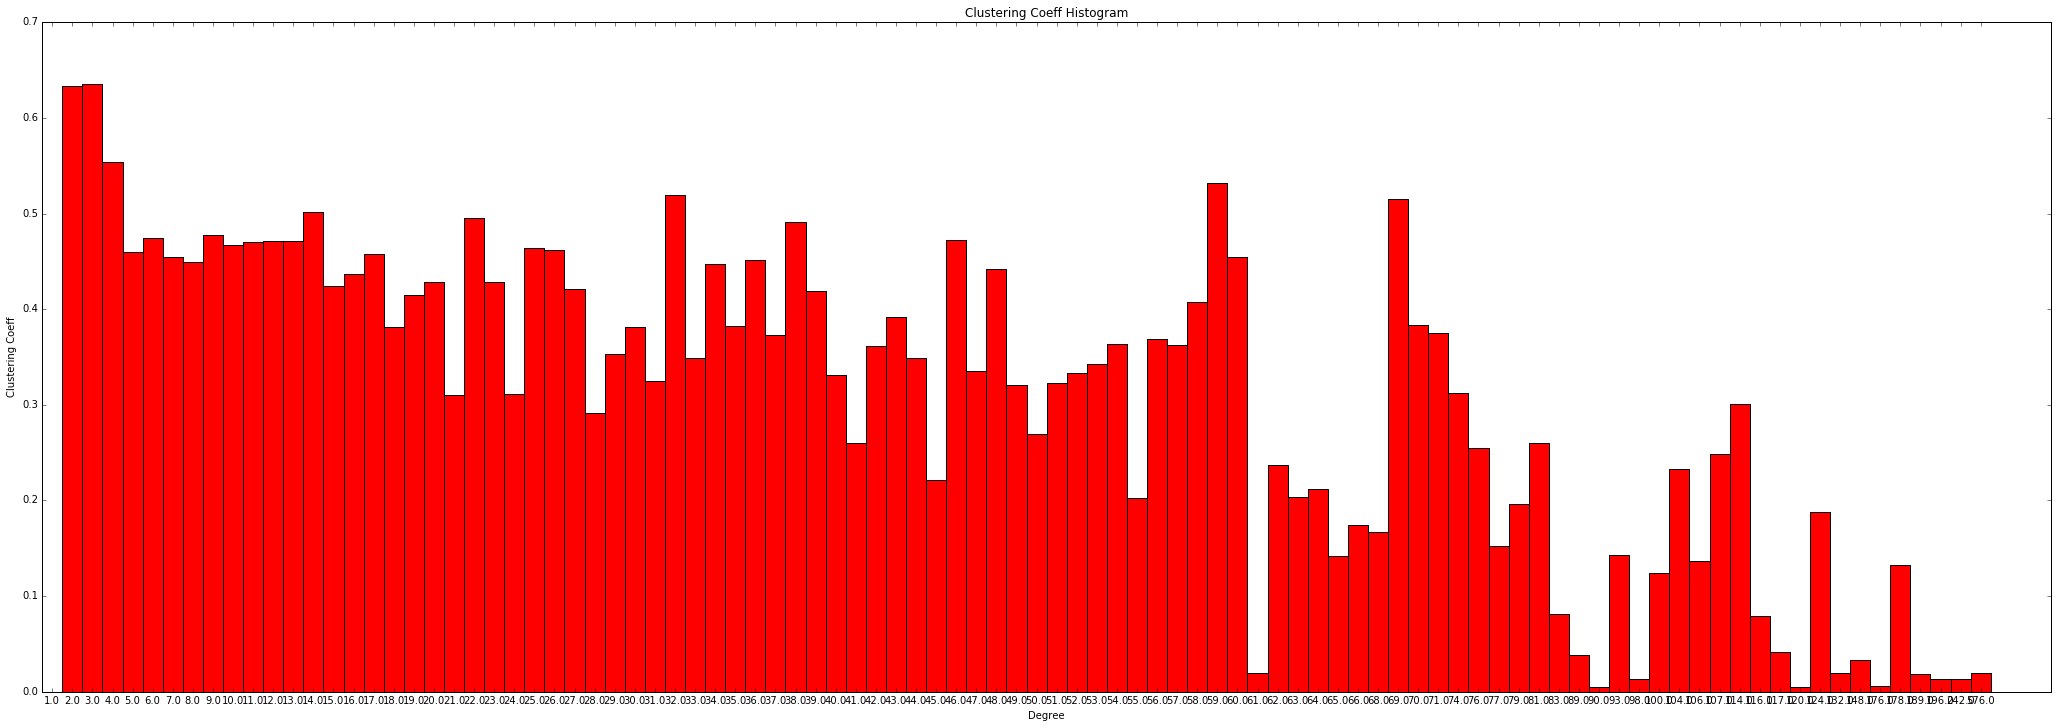

In [31]:
CfVec = TFltPrV()
Cf = GetClustCf(GroupDemoGraphN, CfVec, -1)
print "Average Clustering Coefficient: %f" % (Cf)
print "Coefficients by degree:\n"
#for pair in CfVec:
#    print "degree: %d, clustering coefficient: %f" % (pair.GetVal1(), pair.GetVal2())

DegList = [item.GetVal1() for item in CfVec]
CoefList = [item.GetVal2() for item in CfVec]

pos = np.arange(len(DegList))
width = 1    
plt.bar(pos, CoefList, width, color='r')
plt.title("Clustering Coeff Histogram")
plt.xlabel("Degree")
plt.ylabel("Clustering Coeff")
plt.xticks(pos + width/2.0, DegList )
N = 3
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*N*2,plSize[1]*N))
fig = plt.figure(figsize=(20, 20))
plt.show()

In [32]:
# test if the graph is connected or weakly connected
print "IsConnected(G) =", IsConnected(GroupDemoGraphN)
print "IsWeaklyConnected(G) =", IsWeaklyConn(GroupDemoGraphN)

IsConnected(G) = True
IsWeaklyConnected(G) = True


In [33]:
# get strongly connected components
SCnComV = TCnComV()
GetSccs(GroupDemoGraphN, SCnComV)
for i in range(0, SCnComV.Len()):
    print "SCnComV[%d].Len() = %d" % (i, SCnComV[i].Len())

SCnComV[0].Len() = 1247
SCnComV[1].Len() = 8
SCnComV[2].Len() = 7
SCnComV[3].Len() = 6
SCnComV[4].Len() = 5
SCnComV[5].Len() = 4
SCnComV[6].Len() = 3
SCnComV[7].Len() = 3
SCnComV[8].Len() = 3
SCnComV[9].Len() = 2
SCnComV[10].Len() = 2
SCnComV[11].Len() = 2
SCnComV[12].Len() = 2
SCnComV[13].Len() = 2
SCnComV[14].Len() = 2
SCnComV[15].Len() = 2
SCnComV[16].Len() = 2
SCnComV[17].Len() = 2
SCnComV[18].Len() = 2
SCnComV[19].Len() = 2
SCnComV[20].Len() = 2
SCnComV[21].Len() = 2
SCnComV[22].Len() = 2
SCnComV[23].Len() = 2
SCnComV[24].Len() = 2
SCnComV[25].Len() = 2
SCnComV[26].Len() = 2
SCnComV[27].Len() = 2
SCnComV[28].Len() = 2
SCnComV[29].Len() = 2
SCnComV[30].Len() = 2
SCnComV[31].Len() = 2
SCnComV[32].Len() = 2
SCnComV[33].Len() = 2
SCnComV[34].Len() = 2
SCnComV[35].Len() = 2
SCnComV[36].Len() = 2
SCnComV[37].Len() = 2
SCnComV[38].Len() = 2
SCnComV[39].Len() = 2
SCnComV[40].Len() = 2
SCnComV[41].Len() = 2
SCnComV[42].Len() = 2
SCnComV[43].Len() = 1
SCnComV[44].Len() = 1
SCnComV[45].Len()

In [36]:
# get the graph representing the largest bi-connected component
GMxBi = GetMxBiCon(GroupDemoGraphN)
print "GMxBi: GetNodes() = %d, GetEdges() = %d" % (
    GMxBi.GetNodes(), GMxBi.GetEdges())

GMxBi: GetNodes() = 1890, GetEdges() = 13162


In [34]:
# Computes the Hubs and Authorities score of every node
NIdHubH = TIntFltH()
NIdAuthH = TIntFltH()
GetHits(GroupDemoGraphN, NIdHubH, NIdAuthH)
NIdHubH.SortByDat(False)
NIdAuthH.SortByDat(False)

for item in NIdHubH:
    print " Node Id : %d  Node Name : %s Node Hubs Score : %f " % (item, nodesList[str(item)][1],NIdHubH[item])
print "\n\n-----------------------\n\n"
for item in NIdAuthH:
    print " Node Id : %d  Node Name : %s Node Authorities Score : %f " % (item, nodesList[str(item)][1],NIdAuthH[item])

 Node Id : 37  Node Name : Center for Comparative Conflict Studies (CFCCS)  Node Hubs Score : 0.763864 
 Node Id : 1255  Node Name : Gradjanske Inicijative  Node Hubs Score : 0.177858 
 Node Id : 1363  Node Name : Balkan Trust for Democracy  Node Hubs Score : 0.172650 
 Node Id : 1050  Node Name : SIT Study Abroad: Serbia  Bosnia and Kosovo  Node Hubs Score : 0.152140 
 Node Id : 1282  Node Name : Digitalne umetnosti  Node Hubs Score : 0.142706 
 Node Id : 1354  Node Name : YUCOM Lawyers  Committee for Human Rights  Node Hubs Score : 0.115836 
 Node Id : 1076  Node Name : Kulturni centar REX  Node Hubs Score : 0.100874 
 Node Id : 1286  Node Name : Kuća ljudskih prava Beograd / Human Rights House Belgrade  Node Hubs Score : 0.100089 
 Node Id : 1283  Node Name : Youth Initiative for Human Rights - Kosovo (YIHR KS)  Node Hubs Score : 0.098348 
 Node Id : 1360  Node Name : Stanje ljudskih prava u Srbiji  Node Hubs Score : 0.086535 
 Node Id : 1393  Node Name : Fakultet za medije i komuni

In [35]:
# page rank
PRankH = TIntFltH()
GetPageRank(GroupDemoGraphN, PRankH)
PRankH.SortByDat(False)
for item in PRankH:
    print " Node Id : %d  Node Name : %s Node Page Rank : %f " % (item, nodesList[str(item)][1],PRankH[item])

 Node Id : 764  Node Name : Facebook for Business  Node Page Rank : 0.011985 
 Node Id : 758  Node Name : Facebook  Node Page Rank : 0.011568 
 Node Id : 782  Node Name : TED  Node Page Rank : 0.011083 
 Node Id : 151  Node Name : MoMA The Museum of Modern Art  Node Page Rank : 0.010225 
 Node Id : 308  Node Name : BBC News  Node Page Rank : 0.009061 
 Node Id : 428  Node Name : MoMA PS1  Node Page Rank : 0.009044 
 Node Id : 43  Node Name : Missouri State University  Node Page Rank : 0.005344 
 Node Id : 594  Node Name : The Square  Node Page Rank : 0.004889 
 Node Id : 1704  Node Name : European Commission  Node Page Rank : 0.004408 
 Node Id : 897  Node Name : BBC London  Node Page Rank : 0.004265 
 Node Id : 2020  Node Name : NASA’s Curiosity Mars Rover  Node Page Rank : 0.003821 
 Node Id : 931  Node Name : The Olympic Games  Node Page Rank : 0.003569 
 Node Id : 1413  Node Name : European Youth Forum  Node Page Rank : 0.003564 
 Node Id : 969  Node Name : Council of Europe  Node 

In [36]:
# farness centrality
farCentList = {}
for NI in GroupDemoGraphUN.Nodes():
    FarCentr = GetFarnessCentr(GroupDemoGraphUN, NI.GetId())
    farCentList[nodesList[str(NI.GetId())][1]] = FarCentr
FarCentSort=sorted(farCentList.items(), key=operator.itemgetter(1),reverse=True)
for key,value in FarCentSort:
    print "node name : %s far centrality: %f" % (key, value)

node name : Sivil Toplum Hareketi - Nazilli  far centrality: 5.834116
node name : Beykent unıversıtesı  far centrality: 5.831768
node name : Beykent University  far centrality: 5.831768
node name : Beykent Okulları  far centrality: 5.831377
node name : Beykent TV  far centrality: 5.831377
node name : Sinefesto  far centrality: 5.830986
node name : Eyüp Belediyesi  far centrality: 5.830986
node name : TRT Kurumsal  far centrality: 5.830986
node name : MEDYA SEKTÖRÜ İŞ İLANLARI  far centrality: 5.830986
node name : Eyüp Kültür Sanat  far centrality: 5.830986
node name : pasaj.com  far centrality: 5.827074
node name : OkeyHane  far centrality: 5.827074
node name : Blogcu.com  far centrality: 5.827074
node name : İzlesene.com  far centrality: 5.827074
node name : Yemek Tarifleri  far centrality: 5.827074
node name : doviz  far centrality: 5.827074
node name : fotokritik  far centrality: 5.827074
node name : Marmara Üniversitesi Kütüphaneleri  far centrality: 5.780516
node name : MxM_mx  fa

In [37]:
# closeness centrality
closeCentList = {}
for NI in GroupDemoGraphUN.Nodes():
    CloseCentr = GetClosenessCentr(GroupDemoGraphUN, NI.GetId())
    closeCentList[nodesList[str(NI.GetId())][1]] = CloseCentr
#    print "node: %d centrality: %f" % (NI.GetId(), CloseCentr)
closeCentSort=sorted(closeCentList.items(), key=operator.itemgetter(1),reverse=True)
for key,value in closeCentSort:
    print "node name : %s closeness centrality: %f" % (key, value)

node name : ŞEHİR International  closeness centrality: 0.402393
node name : Center for Comparative Conflict Studies (CFCCS)  closeness centrality: 0.361835
node name : Başka Sinema  closeness centrality: 0.343641
node name : British Council Turkey  closeness centrality: 0.341894
node name : İstanbul Şehir Üniversitesi  closeness centrality: 0.333943
node name : Education Zone  closeness centrality: 0.333856
node name : TED  closeness centrality: 0.330959
node name : Sabanci University International Relations  closeness centrality: 0.323094
node name : BBC News  closeness centrality: 0.320261
node name : British Council  closeness centrality: 0.317555
node name : SIT Study Abroad: Serbia  Bosnia and Kosovo  closeness centrality: 0.317004
node name : Fakultet za medije i komunikacije  closeness centrality: 0.314082
node name : Dan David Prize  closeness centrality: 0.314043
node name : Scholarships.com  closeness centrality: 0.312050
node name : Pravo Ljudski Film Festival  closeness cen

In [ ]:
#CmtyV = TCnComV()   # CHECK PROBLEM
#modularity = CommunityCNM(GroupDemoGraphUN, CmtyV)
#for Cmty in CmtyV:
#    print "Community: "
#    for NI in Cmty:
#        print NI
#print "The modularity of the network is %f" % modularity

In [ ]:
# Girvan-Newman community detection - CHECK  PROBLEM
#CmtyV = TCnComV()
#modularity = CommunityGirvanNewman(GroupDemoGraphUN, CmtyV)
#for Cmty in CmtyV:
#    print "Community: "
#    for NI in Cmty:
#        print NI
#print "The modularity of the network is %f" % modularity

In [34]:
#modularity score of a set of node ids - CHECK PROBLEM
#Nodes = TIntV()
#for nodeId in range(10):
#    Nodes.Add(nodeId)
#print GetModularity(GroupDemoGraphN, Nodes, 1000)

In [38]:
PlotClustCf(GroupDemoGraphN, "pagenetwork-clustcoeff", "Directed graph - clustering coefficient")

In [41]:
# node eccentricity, the largest shortest-path distance from the node NId to any other node in the Graph
nodeEccList = {}
for NI in GroupDemoGraphN.Nodes():
    nodeEccList[nodesList[str(NI.GetId())][1]] = GetNodeEcc(GroupDemoGraphN, NI.GetId(), True)
#    print NI.GetId(), GetNodeEcc(GroupDemoGraphN, NI.GetId(), True)
nodeEccSort=sorted(nodeEccList.items(), key=operator.itemgetter(1),reverse=True)
for key,value in nodeEccSort:
    print "node name : %s closeness centrality: %f" % (key, value)

node name : منتدى الناطقين بالعربية في تركيا  Türkiye de Arapça Konuşanlar Platformu  closeness centrality: 16.000000
node name : Xavier University  closeness centrality: 15.000000
node name : California State University  Northridge  closeness centrality: 15.000000
node name : التركيه TRT  closeness centrality: 15.000000
node name : Adventist University of Health Sciences  closeness centrality: 15.000000
node name : ABI 2013  closeness centrality: 15.000000
node name : ABI 2012  closeness centrality: 15.000000
node name : West Texas A&M University  closeness centrality: 15.000000
node name : Iowa State University  closeness centrality: 15.000000
node name : California State University  Fullerton  closeness centrality: 14.000000
node name : Georgetown University  closeness centrality: 14.000000
node name : WigiSocial.com  closeness centrality: 14.000000
node name : THE CANYONS  closeness centrality: 14.000000
node name : Rasmussen College Online  closeness centrality: 14.000000
node nam

In [43]:
#K-core of the graph Graph
for x in xrange(1,100):
    K = x
    KCore = GetKCore(GroupDemoGraphN, K)
    if KCore.Empty():
        print 'No Core exists for K=%d' % K
        break
    else:
        print 'Core exists for K=%d' % K

 Core exists for K=1
Core exists for K=2
Core exists for K=3
Core exists for K=4
Core exists for K=5
Core exists for K=6
Core exists for K=7
Core exists for K=8
Core exists for K=9
Core exists for K=10
Core exists for K=11
Core exists for K=12
Core exists for K=13
Core exists for K=14
Core exists for K=15
Core exists for K=16
Core exists for K=17
Core exists for K=18
Core exists for K=19
Core exists for K=20
Core exists for K=21
Core exists for K=22
Core exists for K=23
Core exists for K=24
No Core exists for K=25
The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.


In [39]:
# number of nodes for each K-core
CoreIDSzV = TIntPrV()
kValue = GetKCoreNodes(GroupDemoGraphN, CoreIDSzV)
for item in CoreIDSzV:
    print "order: %d nodes: %d" % (item.GetVal1(), item.GetVal2())
PlotKCoreNodes(GroupDemoGraphN, "pagenetwork-KCoreNodes", "Directed graph - k-core nodes")

order: 0 nodes: 2557
order: 1 nodes: 2557
order: 2 nodes: 1999
order: 3 nodes: 1660
order: 4 nodes: 1385
order: 5 nodes: 1185
order: 6 nodes: 1025
order: 7 nodes: 895
order: 8 nodes: 746
order: 9 nodes: 665
order: 10 nodes: 585
order: 11 nodes: 487
order: 12 nodes: 424
order: 13 nodes: 370
order: 14 nodes: 337
order: 15 nodes: 293
order: 16 nodes: 231
order: 17 nodes: 161
order: 18 nodes: 98
order: 19 nodes: 94
order: 20 nodes: 74
order: 21 nodes: 67
order: 22 nodes: 64
order: 23 nodes: 63
order: 24 nodes: 26


In [40]:
# number of edges for each K-core
CoreIDSzV = TIntPrV()
kValue = GetKCoreEdges(GroupDemoGraphN, CoreIDSzV)
for item in CoreIDSzV:
    print "order: %d edges: %d" % (item.GetVal1(), item.GetVal2())
PlotKCoreEdges(GroupDemoGraphN, "pagenetwork-KCoreEdges", "Directed graph - k-core edges")

order: 0 edges: 14001
order: 1 edges: 14001
order: 2 edges: 13443
order: 3 edges: 12779
order: 4 edges: 11999
order: 5 edges: 11221
order: 6 edges: 10439
order: 7 edges: 9709
order: 8 edges: 8761
order: 9 edges: 8126
order: 10 edges: 7424
order: 11 edges: 6493
order: 12 edges: 5849
order: 13 edges: 5232
order: 14 edges: 4841
order: 15 edges: 4291
order: 16 edges: 3441
order: 17 edges: 2557
order: 18 edges: 1627
order: 19 edges: 1555
order: 20 edges: 1290
order: 21 edges: 1152
order: 22 edges: 1089
order: 23 edges: 1067
order: 24 edges: 429


In [41]:
PlotShortPathDistr(GroupDemoGraphN, "pagenetwork-ShortPathDistr", "Directed graph - shortest path")